<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1

## Description of variables:

| Variables   | Description                                                                 |
|-----------|-----------------------------------------------------------------------------|
| CRIM      | Per capita crime rate by town                                               |
| ZN        | Proportion of residential land zoned for lots over 25,000 sq.ft.           |
| INDUS     | Proportion of non-retail business acres per town                           |
| CHAS      | Charles River dummy variable (1 if tract bounds river; 0 otherwise)        |
| NOX       | Nitric oxides concentration (parts per 10 million)                         |
| RM        | Average number of rooms per dwelling                                        |
| AGE       | Proportion of owner-occupied units built prior to 1940                     |
| DIS       | Weighted distances to five Boston employment centres                       |
| RAD       | Index of accessibility to radial highways                                   |
| TAX       | Full-value property-tax rate per $10,000                                    |
| PTRATIO   | Pupil-teacher ratio by town                                                 |
| LSTAT     | % lower status of the population                                            |
| MEDV      | Median value of owner-occupied homes in $1000's                            |


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 2: Generate basic statistics and visualizations for upper management. 

#### 1. For the "Median value of owner-occupied homes" provide a boxplot

<Axes: ylabel='MEDV'>

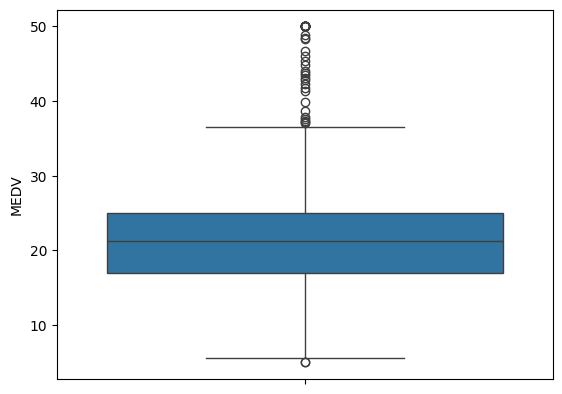

In [5]:
sns.boxplot(data=boston_df, y='MEDV')

#### 2. Provide a  bar plot for the Charles river variable

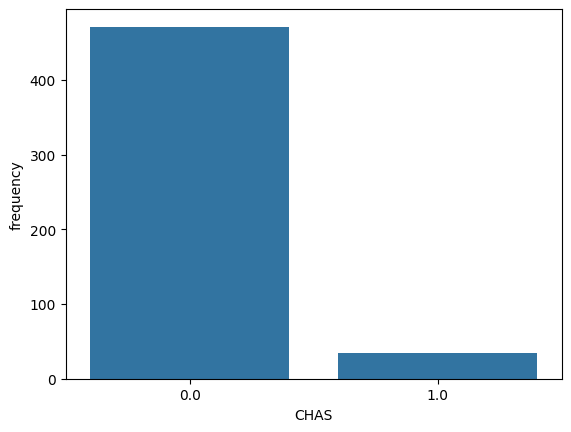

In [6]:
sns.countplot(data=boston_df, x='CHAS')
pyplot.ylabel(ylabel='frequency')
pyplot.show()


#### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

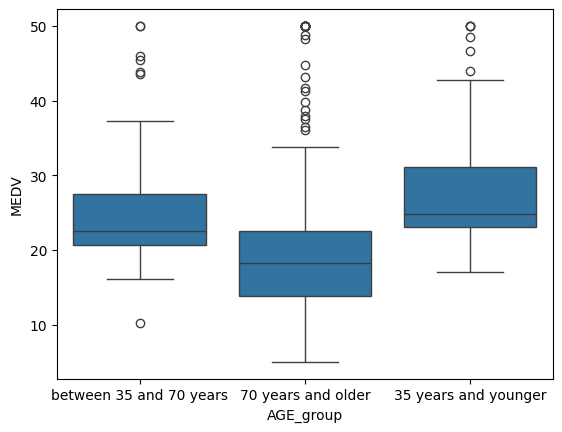

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'

sns.boxplot(data=boston_df, x='age_group', y='MEDV')
pyplot.xlabel('AGE_group')
pyplot.show()

#### 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

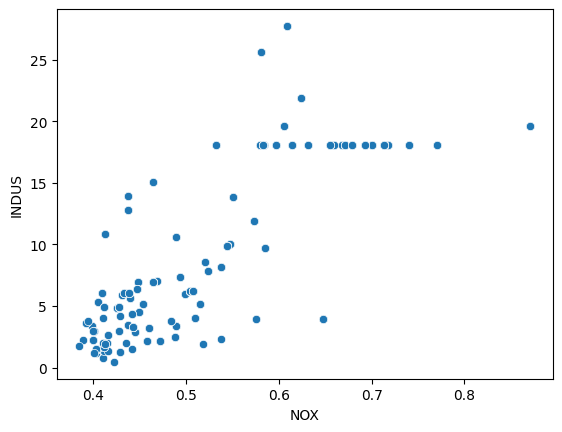

In [8]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
pyplot.show()

> Relationship: **Towns with lower nitric oxid concentration tend to have fewer non-retail business acres.**

#### 5. Create a histogram for the pupil to teacher ratio variable

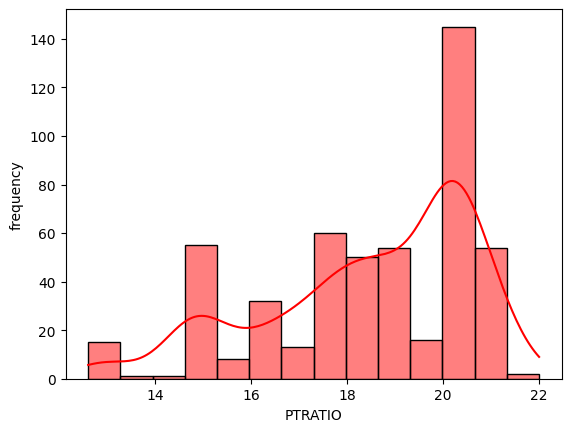

In [9]:
sns.histplot(data=boston_df, x='PTRATIO', kde=True, color='red')
pyplot.ylabel('frequency')
pyplot.show()

## Task 3: Use the appropriate tests to answer the questions provided.

#### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [10]:
nochas_medv = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_medv = boston_df[boston_df['CHAS'] == 1]['MEDV']

scipy.stats.levene(nochas_medv, chas_medv, center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

> **Since p < 0.05, we reject H0 and conclude that there is a statistically significant difference in variances between these groups**.

In [11]:
scipy.stats.ttest_ind(nochas_medv, chas_medv, equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

> **Since p < 0.05, we reject H0 and conclude that there is a statistically significant difference in housing values (MEDV) between properties that are bounded by the Charles River and those that are not.**

#### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'

g1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
g2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
g3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

scipy.stats.f_oneway(g1, g2, g3)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

> **Since the p < 0.05, we reject H0 and conclude there is a statistically significant difference in the median value of houses (MEDV) across at least some of the age groups.**

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241263e-98)

> **Since the p < 0.05, we reject H0 and conclude there is a statistically significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.**

#### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [14]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
prediction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        17:28:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Since p< 0.05, we reject H0 (There is no relationship) and we conclude that an additional weighted distance to the five Boston employment centers has a statistically significant positive impact (1.0916) on the median value of owner-occupied homes.**